# Purpose

This script creates some quick visualizations of the model output and performance to see if the model is overfit or underfit. We look at the training histories, predicted/observed plots, and timeseries plots to see what the data look like in time.

In [1]:
#high level modules
import os
import imp
import pandas as pd

# ml/ai modules
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# import pydot
import matplotlib.pyplot as plt


/var/folders/x8/v7bmckc139v2dqcm04jgfjlr0000gn/T/ipykernel_66697/1235207964.py:3: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:
# import custom modules
this_dir = "/Users/steeleb/Documents/GitHub/NASA-NW/modeling/SMR_temp_forecast/arNN/"
imp.load_source("universals", os.path.join(this_dir, "universal_functions.py"))
from universals import load_keras_model_custom_loss, load_pickle_file, twotemp_labels_features, predict_2_values, print_error_metrics
imp.load_source("vis", os.path.join(this_dir, "vis_functions.py"))
from vis import create_scatter_plot, ts_plot


### Visualize Loss in Training and Validation

Load in training histories models from pickle files craeted in `_leaky_basic_5_vis_t2022.ipynb` 

In [3]:
# model directory path
model_dir = '/Users/steeleb/Documents/GitHub/NASA-NW/data/NN_train_val_test/SMR_forecast/models/weighted_leaky_basic_5/'

histories = [f for f in os.listdir(model_dir) if 'history' in f]
histories.sort()

history_1 = load_pickle_file(histories[0], model_dir)
history_2 = load_pickle_file(histories[1], model_dir)
history_3 = load_pickle_file(histories[2], model_dir)
history_4 = load_pickle_file(histories[3], model_dir)
history_5 = load_pickle_file(histories[4], model_dir)
history_6 = load_pickle_file(histories[5], model_dir)
history_7 = load_pickle_file(histories[6], model_dir)
history_8 = load_pickle_file(histories[7], model_dir)


And plot the loss in training and validation datasets to see if the model is overfitting or underfitting.

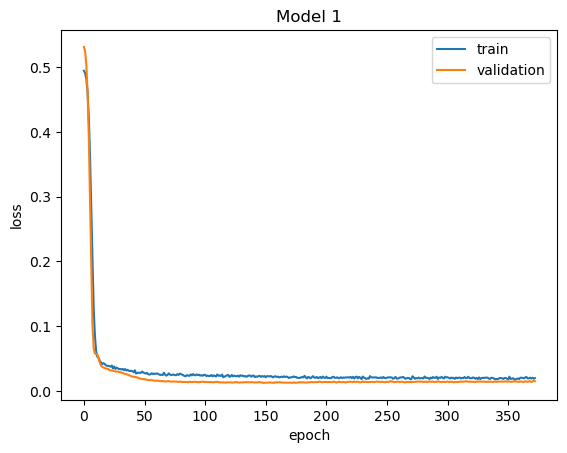

In [4]:
plt.plot(history_1['loss'])
plt.plot(history_1['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 1')
plt.show()

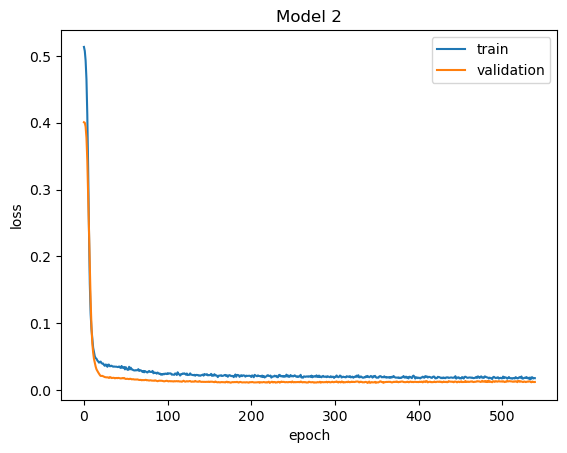

In [5]:
plt.plot(history_2['loss'])
plt.plot(history_2['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 2')
plt.show()

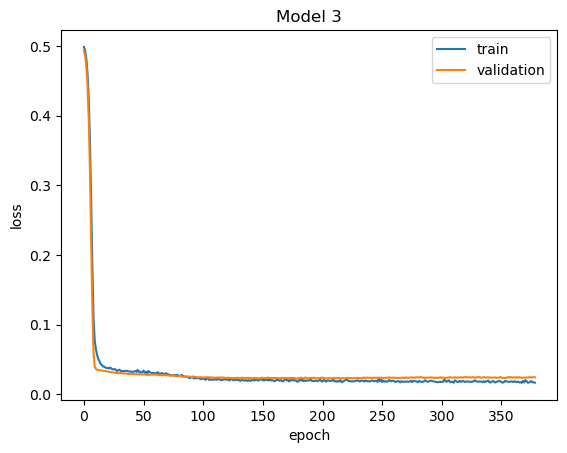

In [6]:
plt.plot(history_3['loss'])
plt.plot(history_3['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 3')
plt.show()

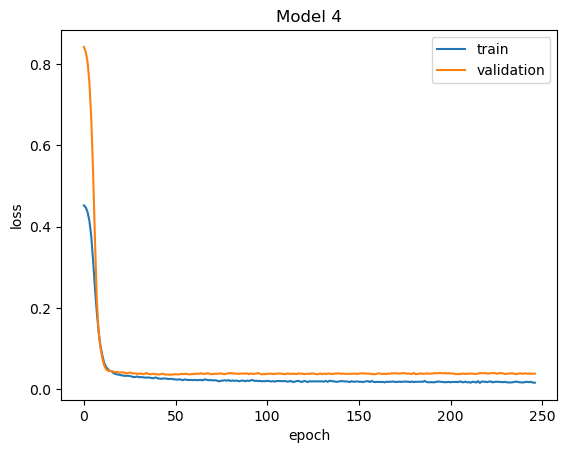

In [7]:
plt.plot(history_4['loss'])
plt.plot(history_4['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 4')
plt.show()

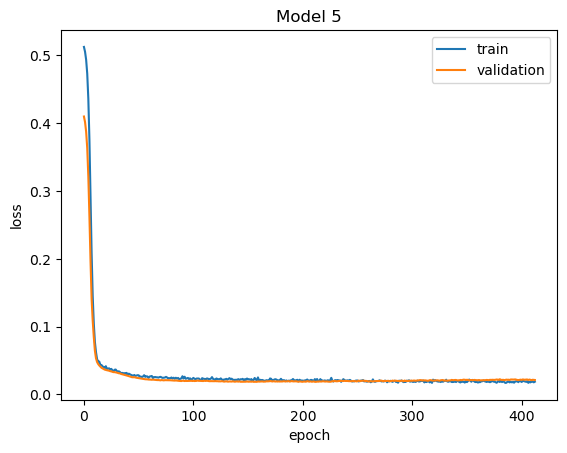

In [8]:
plt.plot(history_5['loss'])
plt.plot(history_5['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 5')
plt.show()

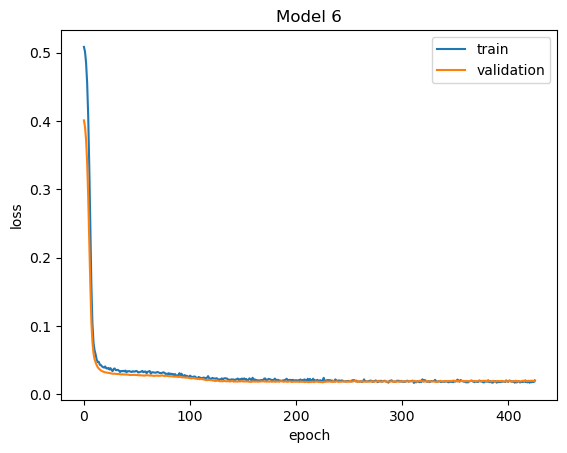

In [9]:
plt.plot(history_6['loss'])
plt.plot(history_6['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 6')
plt.show()

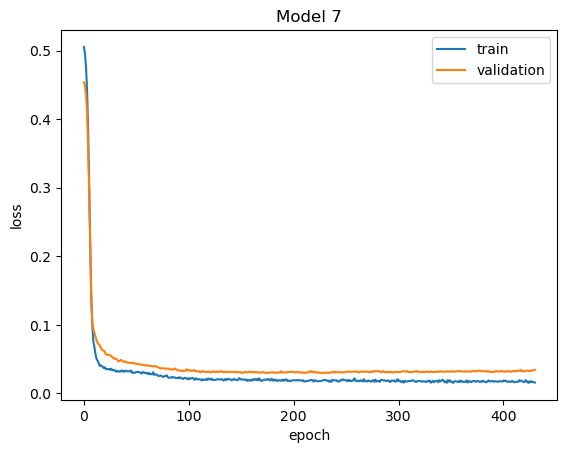

In [10]:
plt.plot(history_7['loss'])
plt.plot(history_7['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 7')
plt.show()

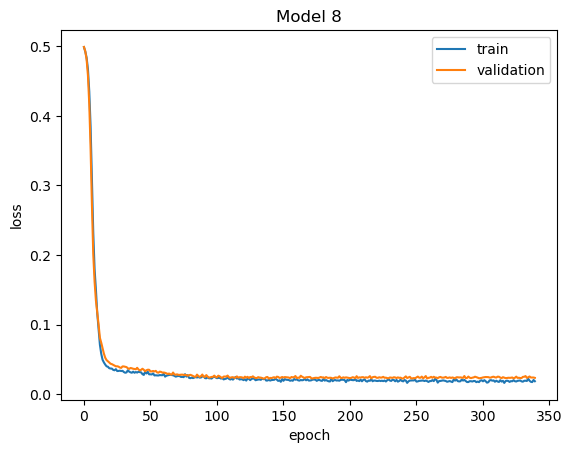

In [11]:
plt.plot(history_8['loss'])
plt.plot(history_8['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 8')
plt.show()

### Visualize Predicted vs Observed

In order to do this, we need to load in the data

In [12]:
data_dir = "/Users/steeleb/Documents/GitHub/NASA-NW/data/NN_train_val_test/SMR_forecast/"

all_files = pd.Series(os.listdir(data_dir))
t2022 = all_files[all_files.str.contains('t2022')]
t2022 = t2022[t2022.str.contains('2024-10-28')]
t2022_val = t2022[t2022.str.contains('validation')]
t2022_train = t2022[t2022.str.contains('training')]

# these files end up in no particular order, so we need to sort them
t2022_val = t2022_val.sort_values()
t2022_train = t2022_train.sort_values()

def load_data(file):
    return pd.read_csv(os.path.join(data_dir, file), sep=',')

val1 = load_data(t2022_val.values[0])
train1 = load_data(t2022_train.values[0])

val2 = load_data(t2022_val.values[1])
train2 = load_data(t2022_train.values[1])

val3 = load_data(t2022_val.values[2])
train3 = load_data(t2022_train.values[2])

val4 = load_data(t2022_val.values[3])
train4 = load_data(t2022_train.values[3])

val5 = load_data(t2022_val.values[5])
train5 = load_data(t2022_train.values[5])

val6 = load_data(t2022_val.values[5])
train6 = load_data(t2022_train.values[5])

val7 = load_data(t2022_val.values[6])
train7 = load_data(t2022_train.values[6])

val8 = load_data(t2022_val.values[7])
train8 = load_data(t2022_train.values[7])

And then create the feature and lables for training and validation datasets

In [13]:
features1, labels_1, val_features1, val_labels_1 = twotemp_labels_features(train1, val1)
features2, labels_2, val_features2, val_labels_2 = twotemp_labels_features(train2, val2)
features3, labels_3, val_features3, val_labels_3 = twotemp_labels_features(train3, val3)
features4, labels_4, val_features4, val_labels_4 = twotemp_labels_features(train4, val4)
features5, labels_5, val_features5, val_labels_5 = twotemp_labels_features(train5, val5)
features6, labels_6, val_features6, val_labels_6 = twotemp_labels_features(train6, val6)
features7, labels_7, val_features7, val_labels_7 = twotemp_labels_features(train7, val7)
features8, labels_8, val_features8, val_labels_8 = twotemp_labels_features(train8, val8)

And load the pickle files from the `_leaky_basic_5_model_t2022.ipynb` notebook

In [14]:
models = [f for f in os.listdir(model_dir) if 'history' not in f]
models = pd.Series(models)[pd.Series(models).str.contains('.keras')]
models = models.sort_values().to_list()

model_1 = load_keras_model_custom_loss(models[0], model_dir)
model_2 = load_keras_model_custom_loss(models[1], model_dir)
model_3 = load_keras_model_custom_loss(models[2], model_dir)
model_4 = load_keras_model_custom_loss(models[3], model_dir)
model_5 = load_keras_model_custom_loss(models[4], model_dir)
model_6 = load_keras_model_custom_loss(models[5], model_dir)
model_7 = load_keras_model_custom_loss(models[6], model_dir)
model_8 = load_keras_model_custom_loss(models[7], model_dir)


And then we need to transform the label data back to the original scale. 

In [15]:
transform = pd.read_csv(os.path.join(data_dir, "mean_std_train_val_t2022_v2024-10-28.csv"), sep=',')
transform = transform.rename(columns={"Unnamed: 0": "feature"}).set_index("feature")


t_mean_1m = transform['mean'].get('mean_1m_temp_degC')
t_std_1m = transform['std'].get('mean_1m_temp_degC')

t_mean_05m = transform['mean'].get('mean_0_5m_temp_degC')
t_std_05m = transform['std'].get('mean_0_5m_temp_degC')



Now, we'll u se the model to predict the labels for the training and validation datasets using the mean and standard deviations from the preprocessing routine.

In [16]:
# Call predict_values for each dataset
p_train_1m_1, p_train_05m_1, act_train_1m_1, act_train_05m_1, p_val_1m_1, p_val_05m_1, act_val_1m_1, act_val_05m_1 = predict_2_values(model_1, features1, val_features1, labels_1, val_labels_1, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_2, p_train_05m_2, act_train_1m_2, act_train_05m_2, p_val_1m_2, p_val_05m_2, act_val_1m_2, act_val_05m_2 = predict_2_values(model_2, features2, val_features2, labels_2, val_labels_2, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_3, p_train_05m_3, act_train_1m_3, act_train_05m_3, p_val_1m_3, p_val_05m_3, act_val_1m_3, act_val_05m_3 = predict_2_values(model_3, features3, val_features3, labels_3, val_labels_3, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_4, p_train_05m_4, act_train_1m_4, act_train_05m_4, p_val_1m_4, p_val_05m_4, act_val_1m_4, act_val_05m_4 = predict_2_values(model_4, features4, val_features4, labels_4, val_labels_4, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_5, p_train_05m_5, act_train_1m_5, act_train_05m_5, p_val_1m_5, p_val_05m_5, act_val_1m_5, act_val_05m_5 = predict_2_values(model_5, features5, val_features5, labels_5, val_labels_5, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_6, p_train_05m_6, act_train_1m_6, act_train_05m_6, p_val_1m_6, p_val_05m_6, act_val_1m_6, act_val_05m_6 = predict_2_values(model_6, features6, val_features6, labels_6, val_labels_6, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_7, p_train_05m_7, act_train_1m_7, act_train_05m_7, p_val_1m_7, p_val_05m_7, act_val_1m_7, act_val_05m_7 = predict_2_values(model_7, features7, val_features7, labels_7, val_labels_7, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_8, p_train_05m_8, act_train_1m_8, act_train_05m_8, p_val_1m_8, p_val_05m_8, act_val_1m_8, act_val_05m_8 = predict_2_values(model_8, features8, val_features8, labels_8, val_labels_8, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)


2024-10-30 14:02:43.315545: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Finally, we can plot the predicted vs observed values for the training and validation datasets.

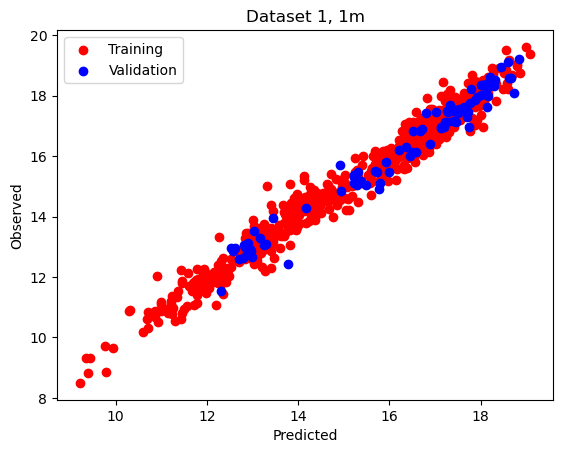

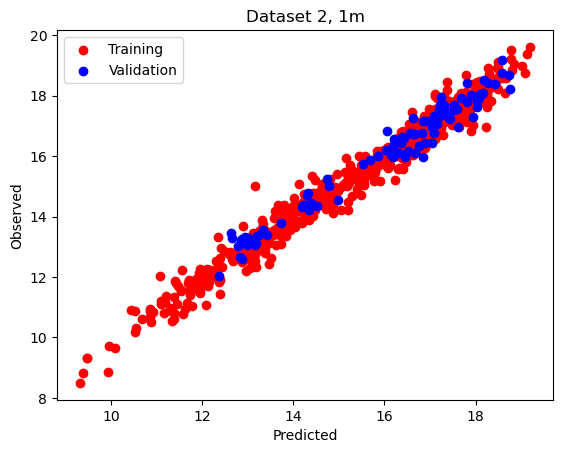

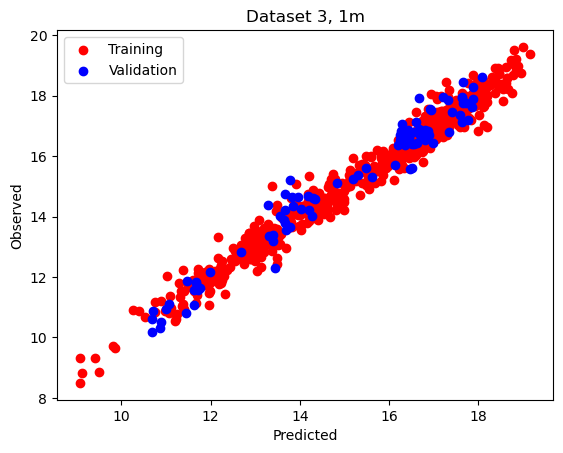

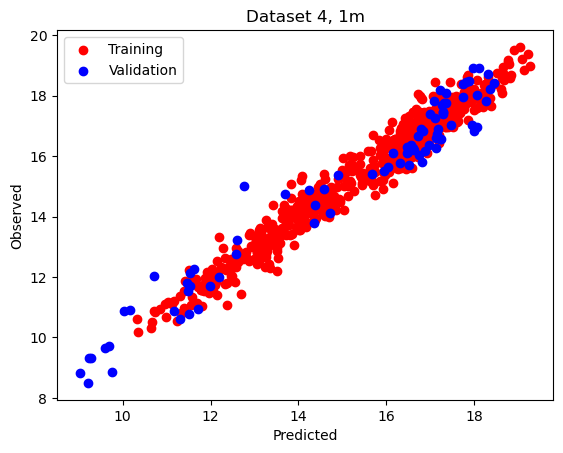

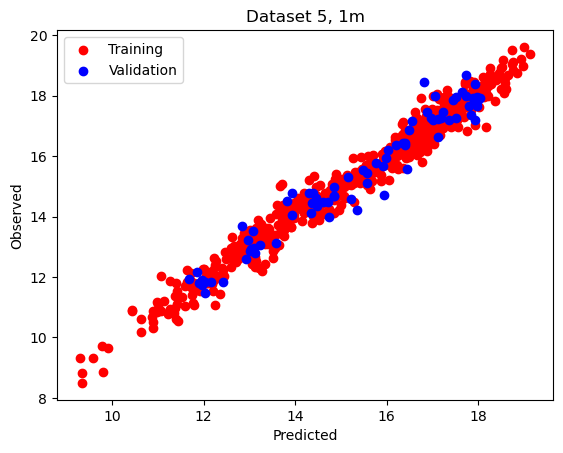

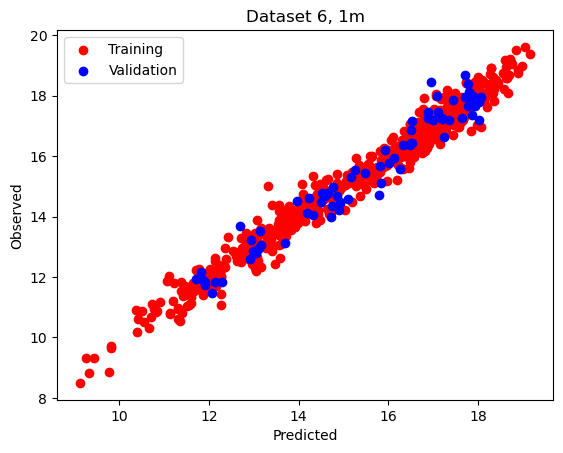

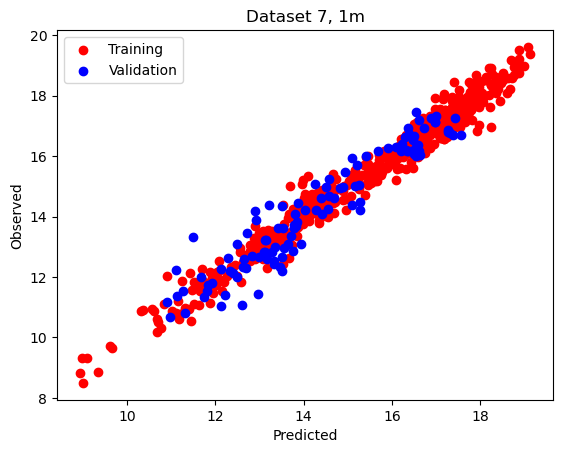

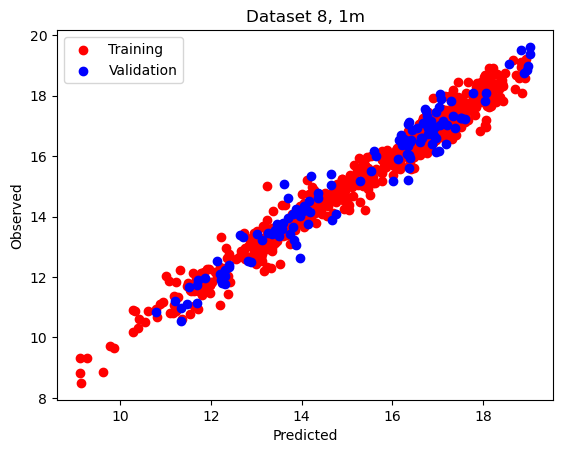

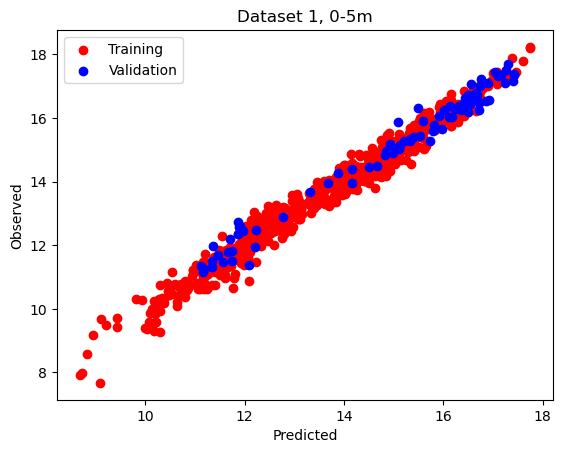

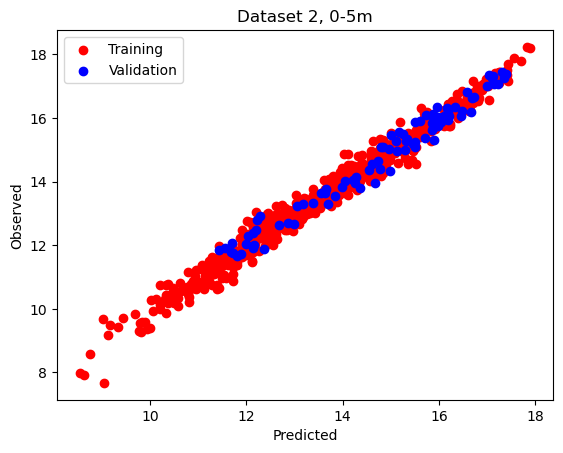

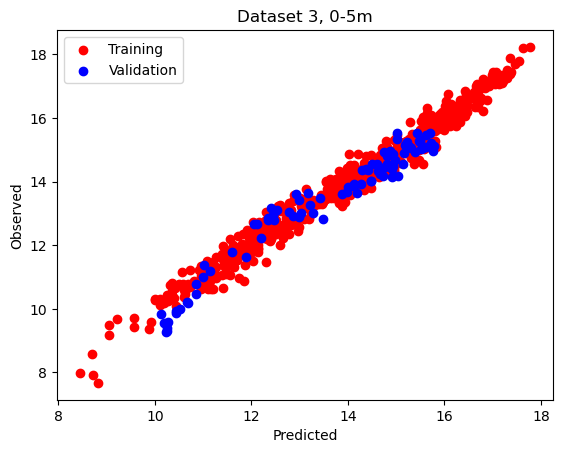

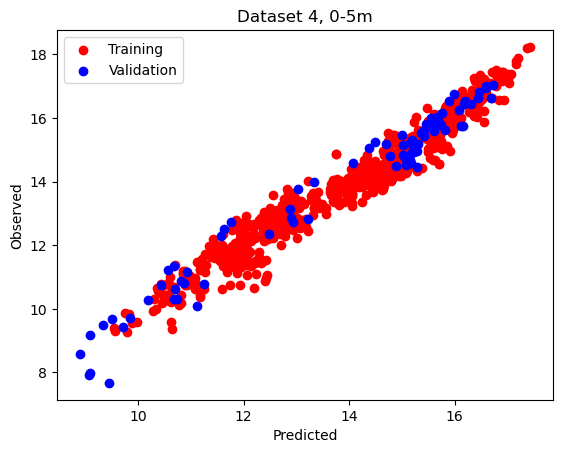

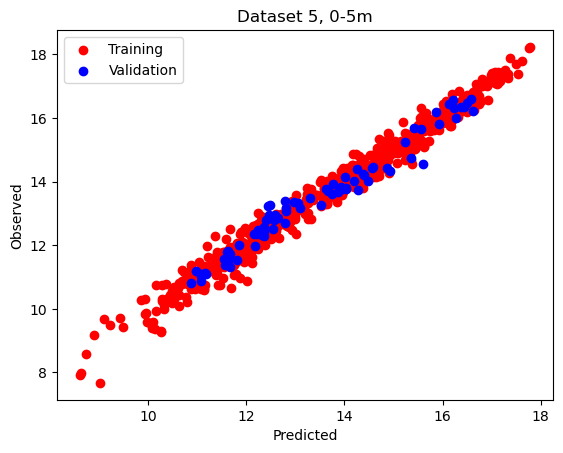

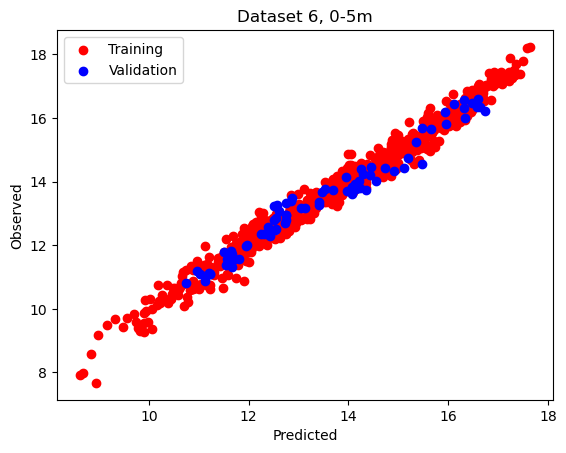

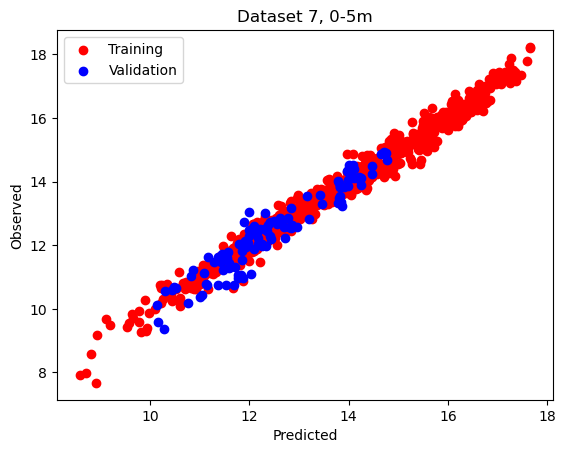

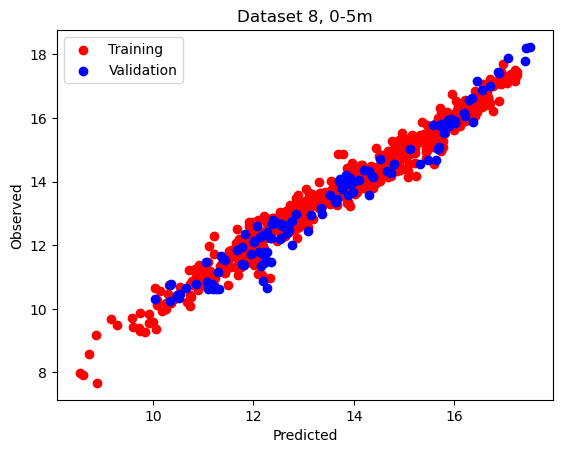

In [17]:
create_scatter_plot('Dataset 1, 1m', p_val_1m_1, act_val_1m_1, p_train_1m_1, act_train_1m_1)
create_scatter_plot('Dataset 2, 1m', p_val_1m_2, act_val_1m_2, p_train_1m_2, act_train_1m_2)
create_scatter_plot('Dataset 3, 1m', p_val_1m_3, act_val_1m_3, p_train_1m_3, act_train_1m_3)
create_scatter_plot('Dataset 4, 1m', p_val_1m_4, act_val_1m_4, p_train_1m_4, act_train_1m_4)
create_scatter_plot('Dataset 5, 1m', p_val_1m_5, act_val_1m_5, p_train_1m_5, act_train_1m_5)
create_scatter_plot('Dataset 6, 1m', p_val_1m_6, act_val_1m_6, p_train_1m_6, act_train_1m_6)
create_scatter_plot('Dataset 7, 1m', p_val_1m_7, act_val_1m_7, p_train_1m_7, act_train_1m_7)
create_scatter_plot('Dataset 8, 1m', p_val_1m_8, act_val_1m_8, p_train_1m_8, act_train_1m_8)

create_scatter_plot('Dataset 1, 0-5m', p_val_05m_1, act_val_05m_1, p_train_05m_1, act_train_05m_1)
create_scatter_plot('Dataset 2, 0-5m', p_val_05m_2, act_val_05m_2, p_train_05m_2, act_train_05m_2)
create_scatter_plot('Dataset 3, 0-5m', p_val_05m_3, act_val_05m_3, p_train_05m_3, act_train_05m_3)
create_scatter_plot('Dataset 4, 0-5m', p_val_05m_4, act_val_05m_4, p_train_05m_4, act_train_05m_4)
create_scatter_plot('Dataset 5, 0-5m', p_val_05m_5, act_val_05m_5, p_train_05m_5, act_train_05m_5)
create_scatter_plot('Dataset 6, 0-5m', p_val_05m_6, act_val_05m_6, p_train_05m_6, act_train_05m_6)
create_scatter_plot('Dataset 7, 0-5m', p_val_05m_7, act_val_05m_7, p_train_05m_7, act_train_05m_7)
create_scatter_plot('Dataset 8, 0-5m', p_val_05m_8, act_val_05m_8, p_train_05m_8, act_train_05m_8)



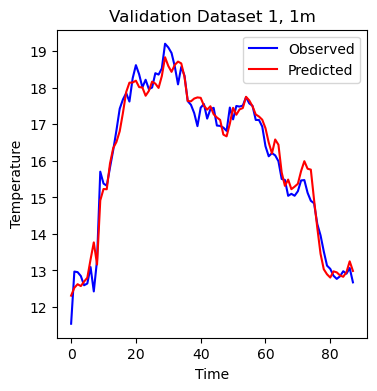

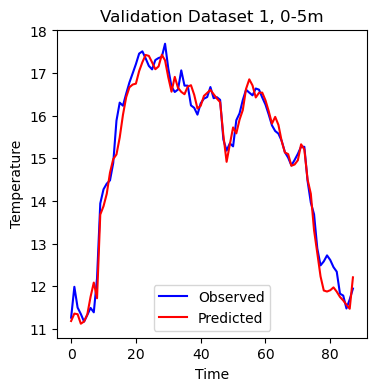

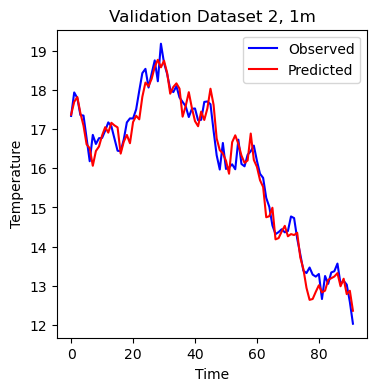

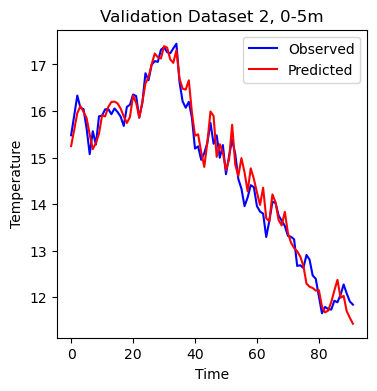

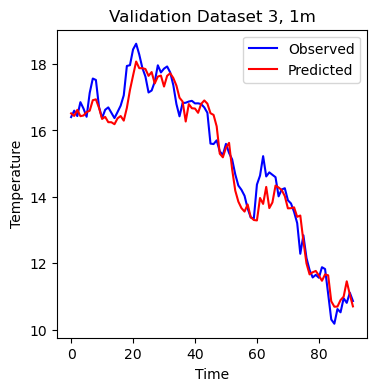

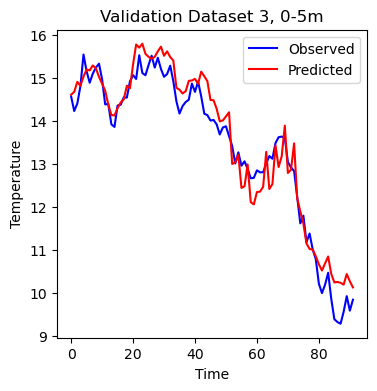

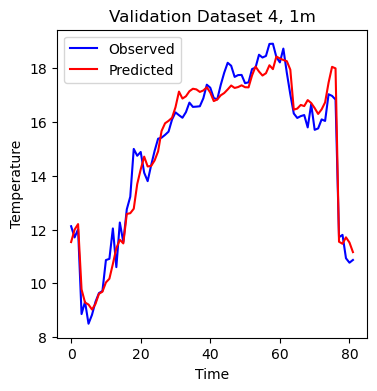

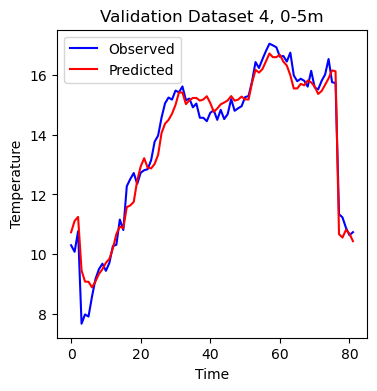

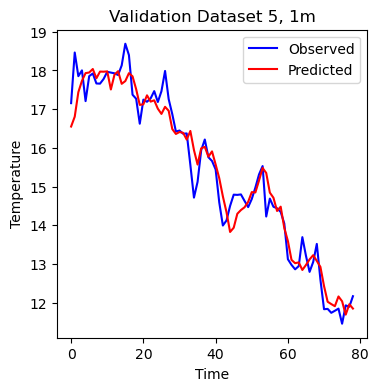

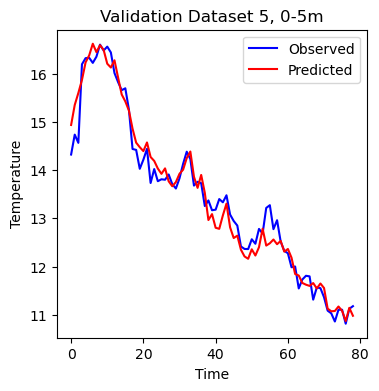

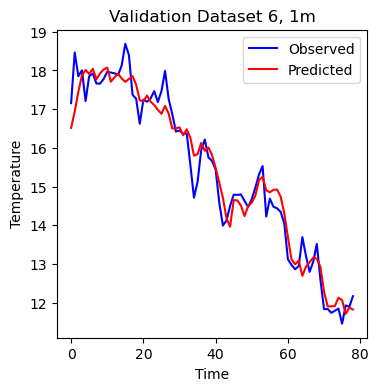

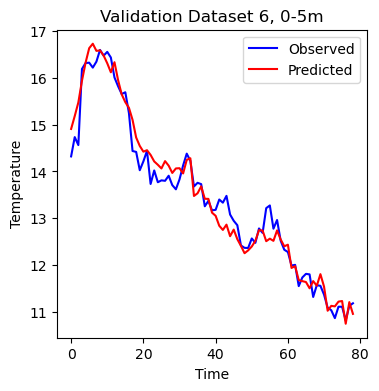

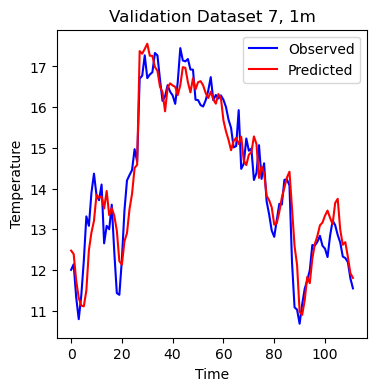

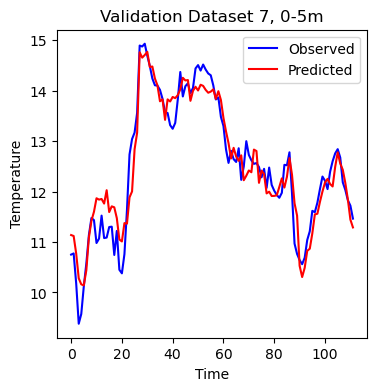

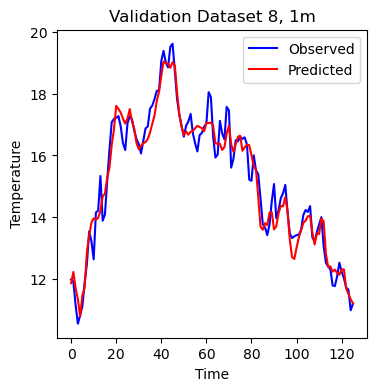

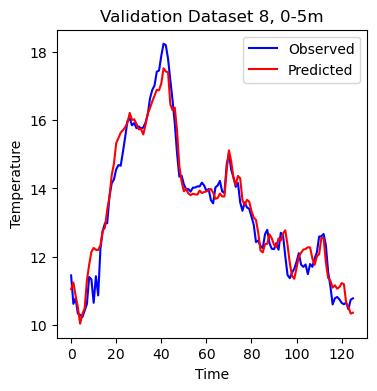

In [18]:
ts_plot(act_val_1m_1, p_val_1m_1, 'Validation Dataset 1, 1m')
ts_plot(act_val_05m_1, p_val_05m_1, 'Validation Dataset 1, 0-5m')
ts_plot(act_val_1m_2, p_val_1m_2, 'Validation Dataset 2, 1m')
ts_plot(act_val_05m_2, p_val_05m_2, 'Validation Dataset 2, 0-5m')
ts_plot(act_val_1m_3, p_val_1m_3, 'Validation Dataset 3, 1m')
ts_plot(act_val_05m_3, p_val_05m_3, 'Validation Dataset 3, 0-5m')
ts_plot(act_val_1m_4, p_val_1m_4, 'Validation Dataset 4, 1m')
ts_plot(act_val_05m_4, p_val_05m_4, 'Validation Dataset 4, 0-5m')
ts_plot(act_val_1m_5, p_val_1m_5, 'Validation Dataset 5, 1m')
ts_plot(act_val_05m_5, p_val_05m_5, 'Validation Dataset 5, 0-5m')
ts_plot(act_val_1m_6, p_val_1m_6, 'Validation Dataset 6, 1m')
ts_plot(act_val_05m_6, p_val_05m_6, 'Validation Dataset 6, 0-5m')
ts_plot(act_val_1m_7, p_val_1m_7, 'Validation Dataset 7, 1m')
ts_plot(act_val_05m_7, p_val_05m_7, 'Validation Dataset 7, 0-5m')
ts_plot(act_val_1m_8, p_val_1m_8, 'Validation Dataset 8, 1m')
ts_plot(act_val_05m_8, p_val_05m_8, 'Validation Dataset 8, 0-5m')


In [19]:
# loop through datasets 1-4 at 1m
for i in range(1, 9):
    act_train_1m = globals()["act_train_1m_" + str(i)]
    pred_train_1m = globals()["p_train_1m_" + str(i)]
    act_val_1m = globals()["act_val_1m_" + str(i)]
    pred_val_1m = globals()["p_val_1m_" + str(i)]
    print_error_metrics(i, act_train_1m, pred_train_1m, act_val_1m, pred_val_1m)


DATASET 1
Mean Squared Error for Training Dataset 1 : 0.15362468548834257
Mean Absolute Error for Training Dataset 1 : 0.30000961688446914
Mean Squared Error for Validation Dataset 1 : 0.12817073372404728
Mean Absolute Error for Validation Dataset 1 : 0.272535525897638
 
DATASET 2
Mean Squared Error for Training Dataset 2 : 0.13460045657530004
Mean Absolute Error for Training Dataset 2 : 0.2816146088919397
Mean Squared Error for Validation Dataset 2 : 0.11494877359833468
Mean Absolute Error for Validation Dataset 2 : 0.2690099850900831
 
DATASET 3
Mean Squared Error for Training Dataset 3 : 0.13524307213501044
Mean Absolute Error for Training Dataset 3 : 0.28329145604789835
Mean Squared Error for Validation Dataset 3 : 0.21897415046395974
Mean Absolute Error for Validation Dataset 3 : 0.3550392478655989
 
DATASET 4
Mean Squared Error for Training Dataset 4 : 0.17245855359276682
Mean Absolute Error for Training Dataset 4 : 0.3225697400059296
Mean Squared Error for Validation Dataset 4 :

In [20]:
# and a 0-5m
for i in range(1, 9):
    act_train_05m = globals()["act_train_05m_" + str(i)]
    pred_train_05m = globals()["p_train_05m_" + str(i)]
    act_val_05m = globals()["act_val_05m_" + str(i)]
    pred_val_05m = globals()["p_val_05m_" + str(i)]
    print_error_metrics(i, act_train_05m, pred_train_05m, act_val_05m, pred_val_05m)


DATASET 1
Mean Squared Error for Training Dataset 1 : 0.09960520909172828
Mean Absolute Error for Training Dataset 1 : 0.24505812716429126
Mean Squared Error for Validation Dataset 1 : 0.09148461977676975
Mean Absolute Error for Validation Dataset 1 : 0.2262097496477908
 
DATASET 2
Mean Squared Error for Training Dataset 2 : 0.08467208544543374
Mean Absolute Error for Training Dataset 2 : 0.2277357024132346
Mean Squared Error for Validation Dataset 2 : 0.0750634031010776
Mean Absolute Error for Validation Dataset 2 : 0.21993850471897178
 
DATASET 3
Mean Squared Error for Training Dataset 3 : 0.08859409661849425
Mean Absolute Error for Training Dataset 3 : 0.22890192680040838
Mean Squared Error for Validation Dataset 3 : 0.18476921496597007
Mean Absolute Error for Validation Dataset 3 : 0.35545033611784804
 
DATASET 4
Mean Squared Error for Training Dataset 4 : 0.19579515457542881
Mean Absolute Error for Training Dataset 4 : 0.35197520117848974
Mean Squared Error for Validation Dataset 

Just a quick reminder of the baseline: 

1m baseline

Mean Squared Error for 1m baseline : 0.23

Mean Absolute Error for 1m baseline : 0.38

0-5m baseline

Mean Squared Error for 0-5m baseline : 0.12

Mean Absolute Error for 0-5m baseline : 0.26

Our model absolutely slays. I want to test a smaller network, but this might be a winner! Let's look at the SHAP before that, though.